# Analyse the number of unique mols/generation for different settings

In [1]:
from glob import glob 

from pathlib import Path

import matplotlib.pyplot as plt

import pandas as pd
import ipyparallel as ipp
import string 

import seaborn as sns
plt.style.use('science')

import sys
sys.path.append('../../')
from utils import get_smiles_sizes, get_pairwise_similarities
import net.evolution_functions as evo

In [2]:
all_files = glob('../ga/results_beta_*/results/results*/*/smiles_ordered.txt')

In [3]:
def get_ratio_unique_mols(file):

    with open(file, 'r') as fh: 
        lines = fh.readlines()
    
    mols = []
    for line in lines: 
        mol, _, _ = evo.sanitize_smiles(line.strip())
        mols.append(mol)
        
    
    sim = get_pairwise_similarities(mols)
            
    return len(set(lines))/len(lines), sim

In [4]:
def split_filename(filename):
    
    parts = Path(filename).parts
    generation = int(parts[-2])
    parts_2 = parts[2].split('_')
    beta = float(parts_2[-2])
    repeat = int(parts_2[-1])
    
    return {
        'beta': beta, 
        'repeat': repeat, 
        'generation': generation
    }

In [5]:
split_filename(all_files[0])

{'beta': -100.0, 'repeat': 1, 'generation': 135}

In [6]:
df = pd.read_csv('experiment_1_diversity_2.csv')

In [7]:
df['beta'].unique()

array([ 100. ,  -10. ,  -50. ,    0. ,    0.1,   10. ,   -0.1, -100. ,
         50. ])

In [8]:
df.head()

,beta,repeat,generation,unique_ratio,similarity
0,100.0,0,338,0.368,0.262878
1,100.0,0,263,0.356,0.359614
2,100.0,0,334,0.356,0.286698
3,100.0,0,69,0.672,0.191365
4,100.0,0,376,0.326,0.230552


In [12]:
df_agg_unique = df.groupby(['beta', 'generation']).agg({'unique_ratio': ['mean', 'std', 'count']}) 
df_agg_similarity = df.groupby(['beta', 'generation']).agg({'similarity': ['mean', 'std', 'count']}) 

In [13]:
df_agg_similarity.head()

similarity                
                        mean       std count
beta   generation                           
-100.0 1            1.000000  0.000000     4
       2            0.266885  0.054054     4
       3            0.085413  0.008929     4
       4            0.078968  0.012879     4
       5            0.084504  0.008853     4

In [22]:
df_agg_unique.loc[100]

unique_ratio                
                   mean       std count
generation                             
1                0.0020  0.000000     5
2                0.0380  0.000000     5
3                0.2304  0.017053     5
4                0.4752  0.033841     5
5                0.6544  0.036315     5
...                 ...       ...   ...
496              0.2732  0.091133     5
497              0.2716  0.061244     5
498              0.2284  0.029100     5
499              0.2608  0.043373     5
500              0.2668  0.057526     5

[500 rows x 3 columns]

In [16]:
import matplotlib
norm = matplotlib.colors.Normalize(vmin=-110, vmax=110)
cmap = matplotlib.cm.get_cmap('coolwarm')

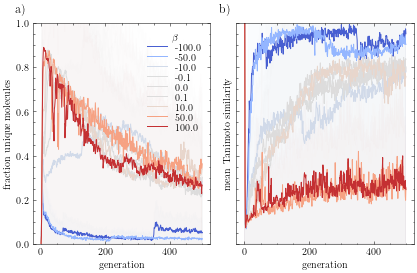

In [96]:
fig, ax = plt.subplots(1,2, figsize=(6,4), sharey='all', sharex='all')

for beta in sorted(df['beta'].unique().tolist()):
    ax[0].fill_between(np.arange(len(df_agg.loc[beta]['unique_ratio']['mean'])), 
            df_agg_unique.loc[beta]['unique_ratio']['mean'] - df_agg_unique.loc[beta]['unique_ratio']['mean'],
             df_agg_unique.loc[beta]['unique_ratio']['mean'] + df_agg_unique.loc[beta]['unique_ratio']['mean'],
            color=cmap(norm(beta)), label='__no_legend__', alpha=.01)
    
for beta in sorted(df['beta'].unique().tolist()):
    ax[0].plot(df_agg_unique.loc[beta]['unique_ratio']['mean'], c=cmap(norm(beta)), label=beta)


for beta in sorted(df['beta'].unique().tolist()):
    ax[1].fill_between(np.arange(len(df_agg_similarity.loc[beta]['similarity']['mean'])), 
            df_agg_similarity.loc[beta]['similarity']['mean'] - df_agg_similarity.loc[beta]['similarity']['mean'],
             df_agg_similarity.loc[beta]['similarity']['mean'] + df_agg_similarity.loc[beta]['similarity']['mean'],
            color=cmap(norm(beta)), label='__no_legend__', alpha=.01)
    
for beta in sorted(df['beta'].unique().tolist()):
    ax[1].plot(df_agg_similarity.loc[beta]['similarity']['mean'], c=cmap(norm(beta)), label=beta)


ax[0].set_xlabel('generation')
ax[1].set_xlabel('generation')
ax[0].set_ylabel('fraction unique molecules')
ax[1].set_ylabel('mean Tanimoto similarity')

ax[0].legend(title=r'$\beta$', labelspacing=0)

for i, a in enumerate(ax):
    a.text(-0.1, 1.05, string.ascii_lowercase[i] + ")", transform=a.transAxes, 
            size=12, weight='bold')
   

ax[1].set_ylim(0,1)
fig.tight_layout()
fig.savefig('fraction_unique.pdf', bbox_inches='tight')

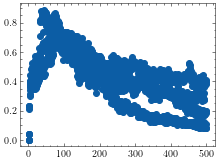

In [41]:
plt.scatter(df[df['beta'] == -0.1]['generation'], df[df['beta'] == -0.1]['unique_ratio'])

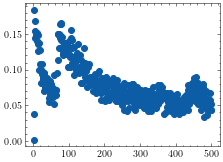

In [44]:
plt.scatter(df[df['beta'] == -100]['generation'], df[df['beta'] == -100]['unique_ratio'])